# Understanding the LSTM cell

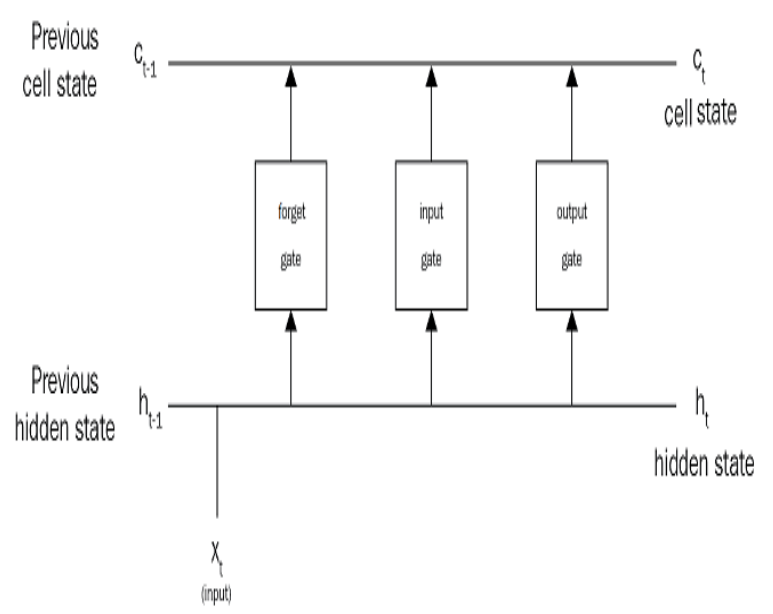

LSTM Cell consists of 3 gates that are responsible for deciding what information to add, output and forget from the memory. With these gates, an LSTM Cell effectively keeps information in the memory as long as required.

Unlike RNN, in the LSTM cell we break the hidden states into two states, called the cell state and the hidden state:
- The cell state is also called internal memory and is where all the
information will be stored
- The hidden state is used for computing the output, that is, for making predictions

Forget Gate

The forget gate, , is responsible for deciding what information should be
removed from the cell state (memory).

The forget gate, $\hat{y}$, at a time step, $t$,
is expressed as follows:
$$ f_t = \sigma{(U_f x_t + W_f h_{t-1} + b_f)} $$

Here, the following applies:
- $U_f$ is the input-to-hidden layer weights of the forget gate
- $W_f$ is the hidden-to-hidden layer weights of the forget gate
- $b_f$ is the bias of the forget gate

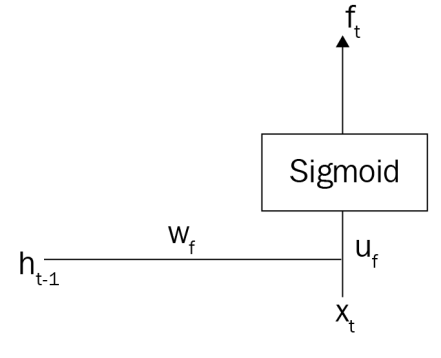

Input Gate

The input gate is responsible for deciding what information should be stored
in the cell state.

The input gate $i$ at time step $t$
is expressed as follows:
$$ i_t = \sigma{(U_i x_t+W_i h_{t-1} + b_i)} $$

Here, the following applies:
- $\beta_1$ is the input-to-hidden weights of the input gate
- $h_m$ is the hidden-to-hidden weights of the input gate
- $b_i$ is the bias of the input gate

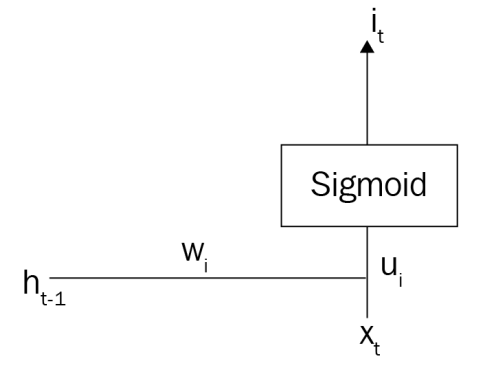

Output gate


The output gate
is responsible for deciding what information should be taken from the cell
state to give as an output.

The output gate $z$ at time step $t$ is expressed as follows:
$$ o_t = \sigma{(U_o x_t+W_o h_{t-1} + b_o)} $$

Here, the following applies:
- $L_0$ is the input-to-hidden weights of the output gate
- $W_o$ is the hidden-to-hidden weights of the output gate
- $\hat{v}_t$ is the bias of the output gate


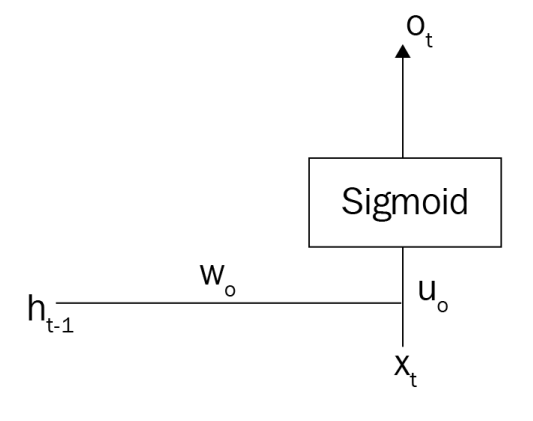

## Forward propagation in LSTM

 Cell state and hidden states are shared across time
steps, meaning that the LSTM computes the cell state, , and hidden state, ,
at time step , and sends it to the next time step:

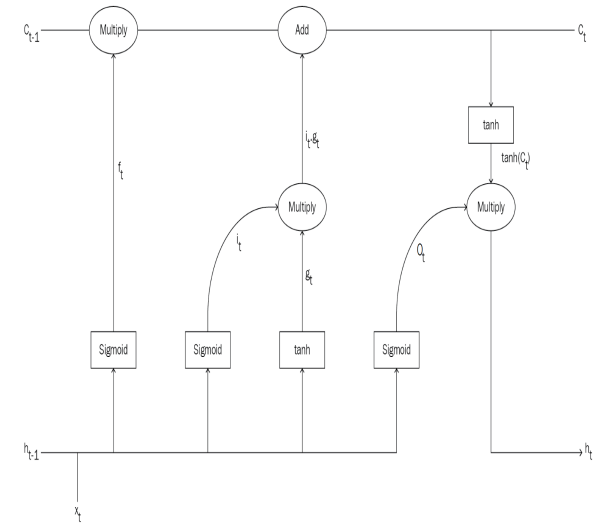

The complete forward propagation steps in the LSTM cell can be given as
follows:
1. Input gate: $i_t = \sigma{(U_i x_t + W_f h_{t-1} + b_i)}$
2. Forget gate: $f_t = \sigma{(U_f x_t + W_f h_{t-1} + b_f)}$
3. Output gate: $o_t = \sigma{(U_o x_t + W_o h_{t-1} + b_o)}$
4. Candidate state: $g_t = tanh(U_g x_t + W_g h_{t-1} + b_g)$
5. Cell state: $c_t = f_t c_{t-1} + i_t g_t$
6. Hidden state: $h_t = o_t tanh(c_t)$
7. Output: $\hat{y}_t = softmax(Vh_t)$


## Backpropagation in LSTM

We compute the loss at each time step to determine how well our LSTM
model is predicting the output. Say we use cross-entropy as a loss function,
then the loss, $L$, at time step $t$ is given by the following equation:
$$L_t = -y_t log(\hat{y}_t)$$

Here, $y_t$ is the actyual output and $\hat{y}_t$ is the predicted outputs at time step $t$

Our final loss is the sum of loss at all time steps, and can be given as
follows:
$$ L = \sum_{j=0}^{T-1}{Lj} $$

We minimize the loss using gradient descent. We find the derivative of loss
with respect to all of the weights used in the network and find the optimal
weights to minimize the loss:
- We have four inputs-to-hidden layer weights, $U_i, U_f, U_o, U_g$, which are the
input-to-hidden layer weights of the input gate, forget gate, output gate,
and candidate state, respectively
- We have four hidden-to-hidden layer weights, $W_i, W_f, W_o, W_g$, which
implies hidden-to-hidden layer weights of input gate, forget gate, output
gate, and candidate state, respectively
- We have one hidden-to-output layer weight, $U$

We find the optimal values for all these weights through gradient descent and
update the weights according to the weight update rule. The weight update
rule is given by the following equation:
$$ weight = weight - \alpha\frac{\partial{loss}}{weight} $$

# Predicting Bitcoin prices using LSTM model

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving btc.csv to btc.csv


In [4]:
df = pd.read_csv('btc.csv')

In [5]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,5/26/2018,BTCUSD,7459.11,7640.46,7380.00,7520.00,2722.80,2.042265e+07
1,5/25/2018,BTCUSD,7584.15,7661.85,7326.94,7459.11,8491.93,6.342069e+07
2,5/24/2018,BTCUSD,7505.00,7734.99,7269.00,7584.15,11033.72,8.293137e+07
3,5/23/2018,BTCUSD,7987.70,8030.00,7433.19,7505.00,14905.99,1.148104e+08
4,5/22/2018,BTCUSD,8393.44,8400.00,7950.00,7987.70,6589.43,5.389753e+07


As shown in the preceding data frame, the Close column represents the closing
price of Bitcoin. We need only the Close column to make predictions, so we
take that particular column alone:

In [6]:
data = df['Close'].values

In [7]:
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

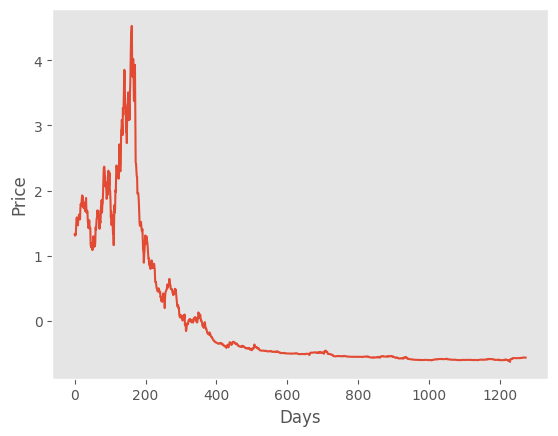

In [8]:
plt.plot(data)
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid()

In [9]:
def get_data(data, window_size):
    X = []
    y = []
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        i += 1
    assert len(X) == len(y)
    return X, y

In [10]:
X, y = get_data(data, window_size = 7)

In [12]:
#train set
X_train = np.array(X[:1000])
y_train = np.array(y[:1000])
#test set
X_test = np.array(X[1000:])
y_test = np.array(y[1000:])

In [13]:
X_train.shape

(1000, 7, 1)

In [14]:
batch_size = 7
window_size = 7
hidden_layer = 256
learning_rate = 0.001

In [15]:
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [16]:
input = tf.compat.v1.placeholder(tf.float32, [batch_size, window_size, 1])
target = tf.compat.v1.placeholder(tf.float32, [batch_size, 1])

The weights of the input gate are defined as follows:

In [17]:
U_i = tf.Variable(tf.compat.v1.truncated_normal([1, hidden_layer], stddev=0.05))
W_i = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
b_i = tf.Variable(tf.compat.v1.zeros([hidden_layer]))

The weights of the forget gate are defined as follows:

In [18]:
U_f = tf.Variable(tf.compat.v1.truncated_normal([1, hidden_layer], stddev=0.05))
W_f = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
b_f = tf.Variable(tf.compat.v1.zeros([hidden_layer]))

The weights of the output gate are defined as given:

In [19]:
U_o = tf.Variable(tf.compat.v1.truncated_normal([1, hidden_layer], stddev=0.05))
W_o = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
b_o = tf.Variable(tf.compat.v1.zeros([hidden_layer]))

The weights of the candidate state are defined as follows:

In [20]:
U_g = tf.Variable(tf.compat.v1.truncated_normal([1, hidden_layer], stddev=0.05))
W_g = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
b_g = tf.Variable(tf.compat.v1.zeros([hidden_layer]))


The output layer weight is given as follows:

In [21]:
V = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, 1], stddev=0.05))
b_v = tf.Variable(tf.compat.v1.zeros([1]))

## Define the LSTM cell

In [22]:
def LSTM_cell(input, prev_hidden_state, prev_cell_state):
    it = tf.sigmoid(tf.matmul(input, U_i) + tf.matmul(prev_hidden_state, W_i) + b_i)
    ft = tf.sigmoid(tf.matmul(input, U_f) + tf.matmul(prev_hidden_state, W_f) + b_f)
    ot = tf.sigmoid(tf.matmul(input, U_o) + tf.matmul(prev_hidden_state, W_o) + b_o)
    gt = tf.tanh(tf.matmul(input, U_g) + tf.matmul(prev_hidden_state, W_g) + b_g)
    ct = (prev_cell_state * ft) + (it * gt)
    ht = ot * tf.tanh(ct)
    return ct, ht

Defining forward propagation


In [23]:
y_hat = []

In [24]:
for i in range(batch_size):
    hidden_state = np.zeros([1, hidden_layer], dtype=np.float32)
    cell_state = np.zeros([1, hidden_layer], dtype=np.float32)
    for t in range(window_size):
        cell_state, hidden_state = LSTM_cell(tf.reshape(input[i][t], (-1, 1)),hidden_state, cell_state)
    y_hat.append(tf.matmul(hidden_state, V) + b_v)

Defining backpropagation

In [26]:
loss_fn = tf.keras.losses.MeanSquaredError()
losses = []

for i in range(len(y_hat)):
    loss_value = loss_fn(tf.reshape(target[i], (-1, 1)), y_hat[i])
    losses.append(loss_value)

loss = tf.reduce_mean(losses)

In [27]:
gradients = tf.gradients(loss, tf.compat.v1.trainable_variables())
clipped, _ = tf.clip_by_global_norm(gradients, 4.0)

In [28]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).apply_gradients(zip(gradients,
tf.compat.v1.trainable_variables()))

## Training the LSTM model

In [29]:
session = tf.compat.v1.Session()
session.run(tf.compat.v1.global_variables_initializer())
epochs = 100

In [30]:
for i in range(epochs):
    train_predictions = []
    index = 0
    epoch_loss = []
    while(index + batch_size) <= len(X_train):
        X_batch = X_train[index:index+batch_size]
        y_batch = y_train[index:index+batch_size]
        #predict the price and compute the loss
        predicted, loss_val, _ = session.run([y_hat, loss, optimizer], feed_dict={input:X_batch, target:y_batch})
        #store the loss in the epoch_loss list
        epoch_loss.append(loss_val)
        #store the predictions in the train_predictions list
        train_predictions.append(predicted)
        index += batch_size
    if (i % 10)== 0:
        print('Epoch {}, Loss: {} '.format(i,np.mean(epoch_loss)))


Epoch 0, Loss: 0.197373166680336 
Epoch 10, Loss: 0.050009023398160934 
Epoch 20, Loss: 0.02723403088748455 
Epoch 30, Loss: 0.01841248758137226 
Epoch 40, Loss: 0.012559630908071995 
Epoch 50, Loss: 0.016080627217888832 
Epoch 60, Loss: 0.008774329908192158 
Epoch 70, Loss: 0.00940975546836853 
Epoch 80, Loss: 0.009088164195418358 
Epoch 90, Loss: 0.008005939424037933 


## Making predictions using the LSTM model


In [31]:
predicted_output = []
i = 0
while i+batch_size <= len(X_test):
    output = session.run([y_hat],feed_dict={input:X_test[i:i+batch_size]})
    i += batch_size
    predicted_output.append(output)

In [32]:
predicted_output[0]

[[array([[-0.6031322]], dtype=float32),
  array([[-0.60098344]], dtype=float32),
  array([[-0.6003511]], dtype=float32),
  array([[-0.5992572]], dtype=float32),
  array([[-0.59914035]], dtype=float32),
  array([[-0.60028166]], dtype=float32),
  array([[-0.59690326]], dtype=float32)]]

In [33]:
predicted_values_test = []
for i in range(len(predicted_output)):
    for j in range(len(predicted_output[i][0])):
        predicted_values_test.append(predicted_output[i][0][j])

In [34]:
predicted_values_test[0]

array([[-0.6031322]], dtype=float32)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

predictions = []
for i in range(1280):
    if i >= 1019:
        value = predicted_values_test[i - 1019]
        if hasattr(value, 'numpy'):
            value = value.numpy()
        value = np.squeeze(value)
        predictions.append(float(value))
    else:
        predictions.append(np.nan)

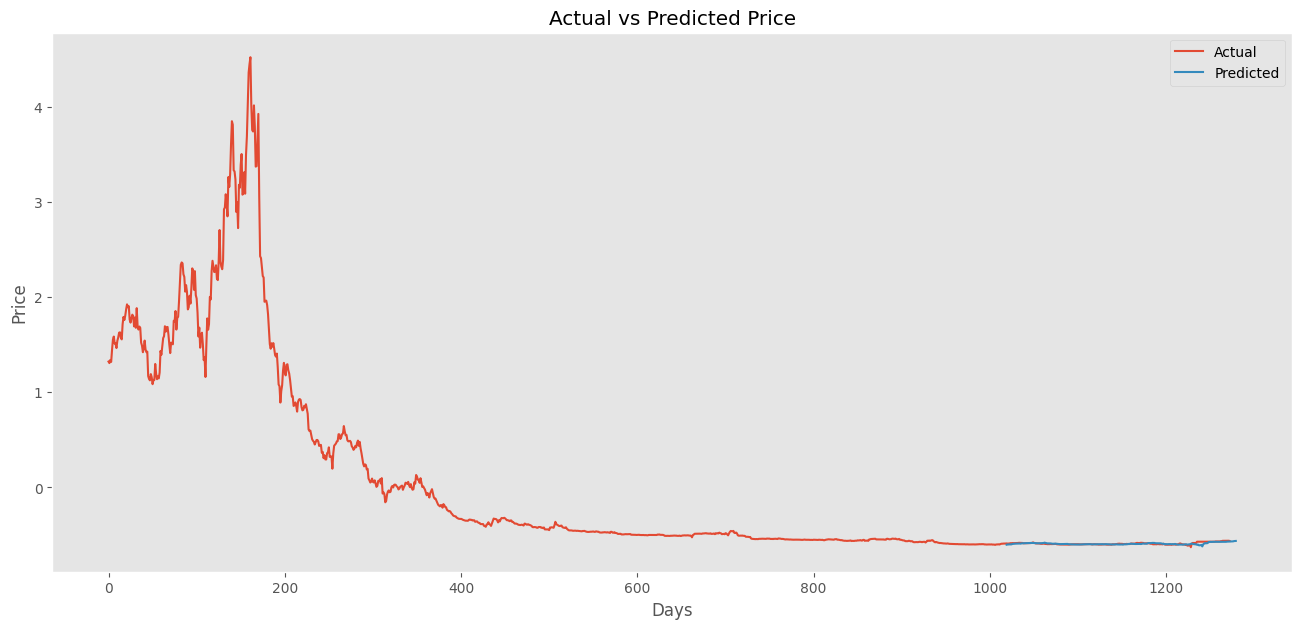

In [45]:
plt.figure(figsize=(16, 7))
plt.plot(data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.grid()
plt.show()

# Gated Recurrent Units(GRU)

Thus, while backpropagating the LSTM network, we need to update a lot of
parameters in every iteration. This increases our training time. So, we
introduce the Gated Recurrent Units (GRU) cell, which acts as a
simplified version of the LSTM cell. Unlike the LSTM cell, the GRU cell has
only two gates and one hidden state.

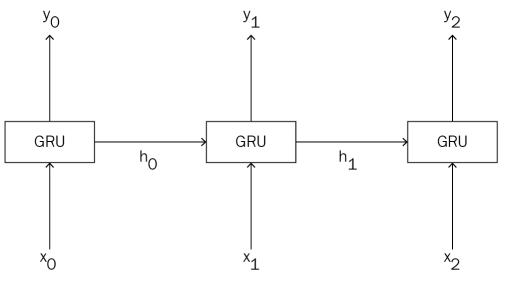

## Forward propagation in a GRU Cell

Putting it all together, the complete forward
propagation steps in the GRU cell can be given as follows:
<br>
1. Update Gate: $\theta = \theta - \alpha. \nabla_\theta J(\theta)$
1. Reset Gate: $\theta = \theta - \alpha. \nabla_\theta J(\theta)$
1. Content Gate: $\theta = \theta - \alpha. \nabla_\theta J(\theta)$
1. Hidden State: $\theta = \theta - \alpha. \nabla_\theta J(\theta)$
1. Output: $\theta = \theta - \alpha. \nabla_\theta J(\theta)$

## Backpropagation in a GRU cell

The total loss, $L$, is the sum of losses at all time steps, and can be given as
follows:
$$ L = \sum_{j=0}^{T-1}{L_j} $$

To minimize the loss using gradient descent, we find the derivative of loss
with respect to all of the weights used in the GRU cell as follows:
- We have three input-to-hidden layer weights, $U_z, U_r, U_c$, which are the
input-to-hidden layer weights of the update gate, reset gate, and content
state, respectively
- We have three hidden-to-hidden layer weights, $W_z, W_r, W_c$, which are
the hidden-to-hidden layer weights of the update gate, reset gate, and
content state respectively
- We have one hidden-to-output layer weight, $U$

# Bidirectional RNNs

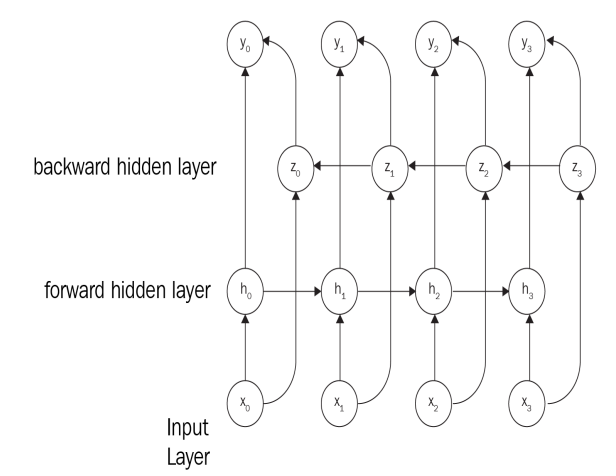

In a bidirectional RNN, we have two different layers of hidden units. Both of
these layers connect from the input layer to the output layer. In one layer, the
hidden states are shared from left to right, and in the other layer, they are
shared from right to left.

As shown in the diagram abvove, we have two hidden layers: a forward
hidden layer and a backward hidden layer, which are described as follows:
- In the forward hidden layer, hidden state values are shared from past
time steps, that is, $\beta_1$ is shared to $h_1, h_1$ is shared to $h_1$, and so on
- In the backward hidden layer, hidden start values are shared from future
time steps, that is, $x_1$ to $z_1$, $z_1$ to $z_1$, and so on

Forward propagatio steps in bidirectional RNNs are given as follows:
<br>
- Forward hidden layer: $$ h_1 = tanh(U x_1 + W h_0) $$
- Backward hidden layer: $$ z_t = \sigma{(U_z x_t + W_z z_{t+1})} $$
- Output: $$ \hat{y}_t = softmax(V_h h_t + V_z z_t) $$

Implementing a bidirectional RNN is simple with TensorFlow. Assuming we
use the LSTM cell in the bidirectional RNN, we can do the following:

In [47]:
import tensorflow as tf

In [48]:
bi_lstm_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10))

## Going deep with deep RNN

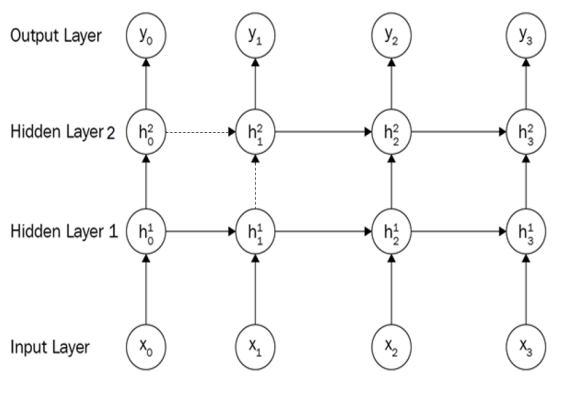

## Language translation using the seq2seq model

The sequence-to-sequence model (seq2seq) is basically the many-to-many
architecture of an RNN. It has been used for various applications because it
can map an arbitrary-length input sequence to an arbitrary-length output
sequence. Some of the applications of the seq2seq model include language
translation, music generation, speech generation, and chatbots.

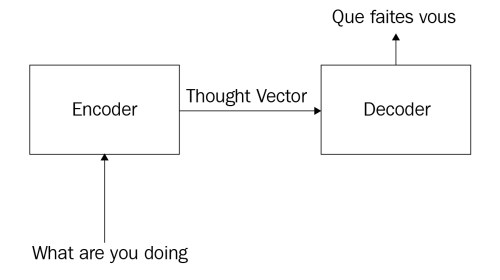

### Encoder

An encoder is basically an RNN with LSTM or GRU cells. It can also be a
bidirectional RNN. We feed the input sentence to an encoder and, instead of
taking the output, we take the hidden state from the final time step as the
embeddings.

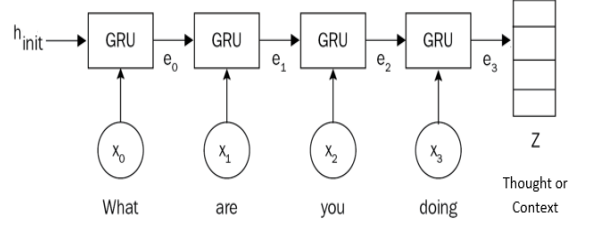

The preceding diagram shows how the encoder computes the thought vectors;
this is explained as follows:
- In the first time step, $t=1$. To a GRU cell, we pass the input, $x_3$,
which is the first word in the input sentence, what, and also the initial
hidden state, $e_{init}$, which is randomly initialized. With these inputs, the
GRU cell computes the first hidden state, $x_t$, as follows:
$$ \hat{y}_t = softmax(Vh_t) $$
- In the next time step, $t=1$, we pass the input, $x_1$, which is the next
word in the input sentence, $are$, to the encoder. Along with this, we also
pass the previous hidden state, $x_t$, and compute the hidden state, $z_1$:
$$ e_1 = GRU(x_1, e_0) $$
- In the next time step, $t=1$, we pass the input, $x_1$, which is the next
word, $you$, to the encoder. Along with this, we also pass the previous
hidden state, $z_1$, and compute the hidden state, $z_1$, as follows:
$$ e_1 = GRU(x_1, e_0) $$
- In the final time step, $t=1$, we feed the input, $x_3$, which is the last
word in the input sentence, $doing$. Along with this, we also pass the
previous hidden state, $e_2$, and compute the hidden state, $x_t$:
$$ e_1 = GRU(x_1, e_0) $$


Thus, $x_t$ is our final hidden state. We learned that the RNN captures the
context of all the words it has seen so far in its hidden state. Since $x_t$ is the
final hidden state, it holds the context of all the words that the network has
seen, which will be all the words in our input sentence, that is, $what, are, you,$
and $doing$.<br><br>
Since the final hidden state, $x_t$, holds the context of all the words in our input
sentence, it holds the context of the input sentence, and this essentially forms
our embedding, $z$, which is otherwise called a thought or context vector, as
follows:
$$ z = e_3 $$
We feed the context vector, $z$, to the decoder to convert it to the target
sentence.

### Decoder

A decoder is an RNN with LSTM
or GRU cells. The goal of our decoder is to generate the target sentence for
the given input (source) sentence.

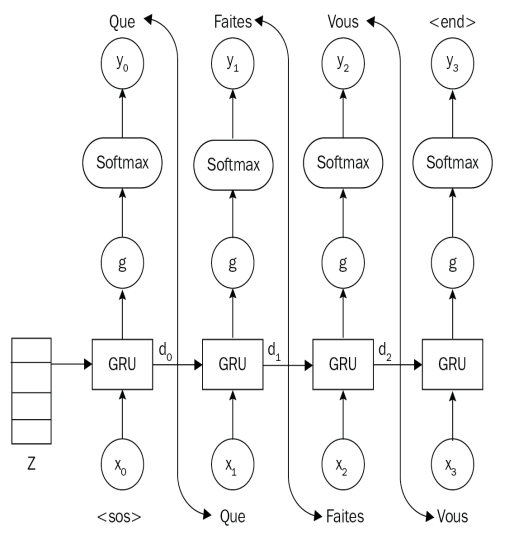

At the first time step, $t=1$, we feed the first input, which is <strong>&lt;sos&gt;</strong>, to the
decoder, and along with it, we pass the thought vector as the initial hidden
state as follows:
$$ d_0 = GRU(z, z_{sos}) $$
Okay. What are we really doing here? We need to predict the output sequence,
which is a French equivalent for our input English sentence. There are a lot of
French words in our vocabulary. How does the decoder decide which word
to output? That is, how does it decide the first word in our output sequence?
<br><br>
We feed the decoder hidden state, $d_0$, to $g(.)$, which returns the score for all
the words in our vocabulary to be the first output word. That is, the output
word at a time step, $t=1$ is computed as follows:
$$ s_0 = g(d_0) $$
Instead of having raw scores, we convert them into probabilities. Since we
learned that the softmax function squashes values between 0 to 1, we use the
softmax function for converting the score, $z$, into a probability, $p$ :
$$ p_o = softmax(s_0) $$
Thus, we have probabilities for all the French words in our vocabulary to be
the first output word. We select the word that has the highest probability as the
first output word using the argmax function:
$$ y_0 = argmax(p_0) $$
So, we have predicted that the first output word, $y_1$, is $Que$, as shown in the
preceding diagram.<br><br>
On the next time step, $t=1$, we feed the output word predicted at the
previous time step, $y_1$, as input to the decoder. Along with it, we also pass the
previous hidden state, $d_0$:
$$ d_1 = GRU(d_0, y_0) $$
Then, we compute the score for all the words in our vocabulary to be the next
output word, that is, the output word at time step $t=1$:
$$s_0 = g(d_0)$$
Then, we convert the scores to probabilities using the softmax function:
$$ p_0 = softmax(s_0) $$
Next, we select the word that has the highest probability as the output word, $y_1$, at a time step, $t=1$:
$$ y_0 = argmax(p_0) $$

Thus, we initialize the decoder's initial hidden state with $z$, and, on every
time step, $t$, we feed the predicted output word from the previous time step, $y_{t-1}$
, and the previous hidden state, $d_{t-1}$, as an input to the decoder, $\hat{v}_t$, at
the current time step, and predict the current output, $y_t$.<br><br>
But when does the decoder stop? Because our output sequence has to stop
somewhere, we cannot keep on feeding the predicted output word from the
previous time step as an input to the next time step. When the decoder predicts
the output word as <strong>&lt;sos&gt;</strong>, this implies the end of the sentence. Then, the
decoder learns that an input source sentence is converted to a meaningful
target sentence and stops predicting the next word.<br><br>
Thus, this is how the seq2seq model converts the source sentence to the target
sentence.
